## Project- Natural Language Processing

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
yelp = pd.read_csv('Sample.csv')

In [7]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [8]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [9]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [41]:
len(yelp['text'][0])

889

In [11]:
#Create a function for counting number of words in the column
def word_count(text):
    return len(text)

In [12]:
yelp['text length'] = yelp['text'].apply(word_count)

In [44]:
yelp.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0,668
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0,881
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0,1425
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0,880
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0,461


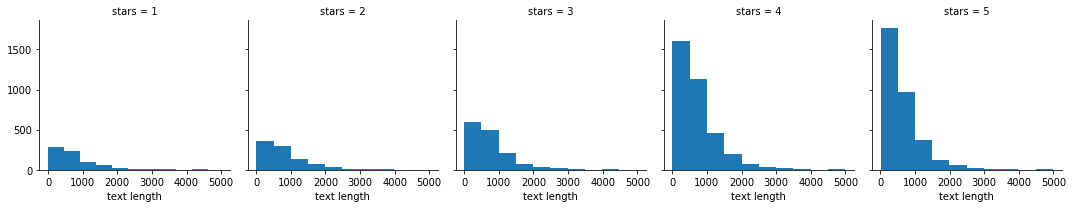

In [45]:
g=sns.FacetGrid(yelp,col="stars")
g.map(plt.hist,"text length")
#yelp.groupby('stars')['text length'].value_counts().hist()

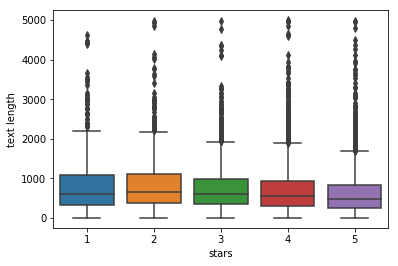

In [46]:
sns.boxplot(x="stars",y="text length",data=yelp)

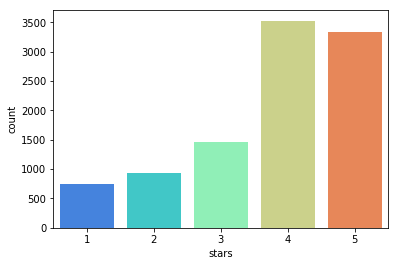

In [172]:
sns.countplot("stars",data=yelp,palette='rainbow')

In [50]:
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889


In [173]:
#df=yelp.groupby('stars')[['cool','useful','funny','text length']].mean()
# Or
df = yelp.groupby('stars').mean()

In [174]:
df

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [53]:
df.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


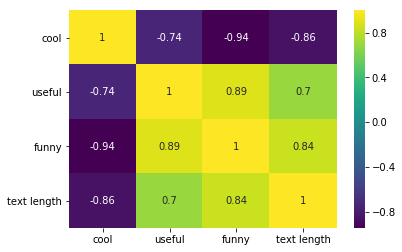

In [56]:
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [57]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [13]:
yelp_class=yelp[(yelp['stars']==1) | (yelp['stars']==5)]

In [73]:
yelp_class.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0,461


In [14]:
X=yelp_class['text']
#y=yelp_class['stars']

In [15]:
y=yelp_class['stars']

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
cv = CountVectorizer()

In [85]:
X = cv.fit_transform(X)

In [19]:
from sklearn.cross_validation import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [96]:
nb = MultinomialNB()

In [97]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [98]:
prediction= nb.predict(X_test)

In [139]:
from sklearn.metrics import classification_report,confusion_matrix

In [140]:
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))

[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



#### Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer

In [23]:
from sklearn.pipeline import Pipeline

In [147]:
X=yelp_class['text']
y=yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [175]:
pipeline = Pipeline([
        ('bow',CountVectorizer()),
        ('tfidf',TfidfTransformer()),
        ('classifier',MultinomialNB())
]
)

In [176]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [150]:
predictions= pipeline.predict(X_test)

In [151]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



c:\program files\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [152]:
import string

In [153]:
from nltk.corpus import stopwords

In [154]:
def count_word(mess):
    """
    1. Remove Punctuation from sentences.
    2. Remove Stopwords from the input column.
    3. Return a list of words which would be read by NLP.
    """
    no_pun = [no_p for no_p in mess if no_p not in string.punctuation] # Breaking down sentence into chars
    no_pun=''.join(no_pun) # joining chars to form words
    return [word_list for word_list in no_pun.split() if no_pun.lower() not in stopwords.words('english')] #return 

### Removing Punctuation & stopwords from the original text

In [155]:
X=yelp_class['text']
y=yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [156]:
pipeline = Pipeline([
        ('bow',CountVectorizer(analyzer=count_word)),
        ('tfidf',TfidfTransformer()),
        ('classifier',MultinomialNB())
]
)

In [157]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function count_word at 0x000000003773C730>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [158]:
predictions= pipeline.predict(X_test)

In [159]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



c:\program files\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Just splitting the words in a regular list

In [30]:
def split_ext(inp):
    return inp.split()

In [162]:
X=yelp_class['text']
y=yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [163]:
pipeline = Pipeline([
        ('bow',CountVectorizer(analyzer=split_ext)),
        ('tfidf',TfidfTransformer()),
        ('classifier',MultinomialNB())
]
)

In [164]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function split_ext at 0x000000003706C9D8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [165]:
predictions= pipeline.predict(X_test)

In [166]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



c:\program files\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Applying split_ext over the entire message text:

In [167]:
X=yelp['text']
y=yelp['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [168]:
pipeline = Pipeline([
        ('bow',CountVectorizer(analyzer=split_ext)),
        ('tfidf',TfidfTransformer()),
        ('classifier',MultinomialNB())
]
)

In [169]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function split_ext at 0x000000003706C9D8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [170]:
predictions= pipeline.predict(X_test)

In [171]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test,predictions))

[[   0    0    0  206   14]
 [   0    0    0  271    2]
 [   0    0    0  433   10]
 [   0    0    0 1024   40]
 [   0    0    0  791  209]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00       220
          2       0.00      0.00      0.00       273
          3       0.00      0.00      0.00       443
          4       0.38      0.96      0.54      1064
          5       0.76      0.21      0.33      1000

avg / total       0.39      0.41      0.30      3000



c:\program files\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [184]:
X=yelp['text']
y=yelp['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [179]:
pipeline = Pipeline([
        ('bow',CountVectorizer(analyzer=split_ext)),
        ('tfidf',TfidfTransformer()),
        ('classifier',LogisticRegression())
]
)

In [186]:
pipeline = Pipeline([
        ('bow',CountVectorizer(analyzer=split_ext)),
        ('tfidf',TfidfTransformer()),
        ('classifier',LinearRegression())
]
)

In [180]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function split_ext at 0x000000003706C9D8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [181]:
predictions= pipeline.predict(X_test)

In [182]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 50  12   6  61  91]
 [ 18  21  51 132  51]
 [  2   4  63 299  75]
 [  3   1  14 710 336]
 [  0   3   6 328 663]]


             precision    recall  f1-score   support

          1       0.68      0.23      0.34       220
          2       0.51      0.08      0.13       273
          3       0.45      0.14      0.22       443
          4       0.46      0.67      0.55      1064
          5       0.55      0.66      0.60      1000

avg / total       0.51      0.50      0.46      3000



In [187]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function split_ext at 0x000000003706C9D8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...rue)), ('classifier', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [188]:
predictions= pipeline.predict(X_test)

## Linear Regression can't be used with a mixed target. It needs only one target & that is numeric

In [192]:
#print(confusion_matrix(y_test, predictions))
#print('\n')
#print(classification_report(y_test,predictions))

#ERROR
#ValueError: Classification metrics can't handle a mix of multiclass and continuous targets.

## Decision tree & Random forest

In [194]:
from sklearn.tree import DecisionTreeClassifier

In [195]:
X=yelp['text']
y=yelp['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [196]:
pipeline = Pipeline([
        ('bow',CountVectorizer(analyzer=split_ext)),
        ('tfidf',TfidfTransformer()),
        ('classifier',DecisionTreeClassifier())
]
)

In [197]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function split_ext at 0x000000003706C9D8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [198]:
predictions= pipeline.predict(X_test)

In [199]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 42  21  29  68  60]
 [ 35  34  43  93  68]
 [ 36  50  77 158 122]
 [ 44  68 138 442 372]
 [ 52  53 113 338 444]]


             precision    recall  f1-score   support

          1       0.20      0.19      0.20       220
          2       0.15      0.12      0.14       273
          3       0.19      0.17      0.18       443
          4       0.40      0.42      0.41      1064
          5       0.42      0.44      0.43      1000

avg / total       0.34      0.35      0.34      3000



In [200]:
from sklearn.ensemble import RandomForestClassifier

In [201]:
X=yelp['text']
y=yelp['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [202]:
pipeline = Pipeline([
        ('bow',CountVectorizer(analyzer=split_ext)),
        ('tfidf',TfidfTransformer()),
        ('classifier',RandomForestClassifier())
]
)

In [203]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function split_ext at 0x000000003706C9D8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [204]:
predictions= pipeline.predict(X_test)

In [205]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 16  24  19  88  73]
 [ 11  24  28 148  62]
 [  6  21  43 259 114]
 [  9  20  81 599 355]
 [  8  18  38 462 474]]


             precision    recall  f1-score   support

          1       0.32      0.07      0.12       220
          2       0.22      0.09      0.13       273
          3       0.21      0.10      0.13       443
          4       0.38      0.56      0.46      1064
          5       0.44      0.47      0.46      1000

avg / total       0.36      0.39      0.35      3000



## Using Kmeans

In [206]:
from sklearn.cluster import KMeans

In [207]:
X=yelp['text']
y=yelp['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [208]:
pipeline = Pipeline([
        ('bow',CountVectorizer(analyzer=split_ext)),
        ('tfidf',TfidfTransformer()),
        ('classifier',KMeans())
]
)

In [209]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function split_ext at 0x000000003706C9D8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [210]:
predictions= pipeline.predict(X_test)

In [211]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test,predictions))

[[  0   0   0   0   0   0   0   0]
 [  1  54  17  32  50   0   4  62]
 [  2  76  50  40  44   0   3  58]
 [  2 107 115  57  65   9  12  76]
 [ 18 209 318 127 198  43  15 136]
 [ 21 118 259 102 261  43  26 170]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.10      0.25      0.14       220
          2       0.07      0.18      0.10       273
          3       0.16      0.13      0.14       443
          4       0.32      0.19      0.24      1064
          5       0.45      0.04      0.08      1000
          6       0.00      0.00      0.00         0
          7       0.00      0.00      0.00         0

avg / total       0.30      0.13      0.15      3000



c:\program files\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## As we find from above used algorithms... Using KMEANS is obviously not a Good Idea.. :p

## Using K Nearest Neighbours

In [213]:
from sklearn.neighbors import KNeighborsClassifier

In [214]:
X=yelp['text']
y=yelp['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [215]:
pipeline = Pipeline([
        ('bow',CountVectorizer(analyzer=split_ext)),
        ('tfidf',TfidfTransformer()),
        ('classifier',KNeighborsClassifier())
]
)

In [216]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function split_ext at 0x000000003706C9D8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [217]:
predictions= pipeline.predict(X_test)

In [218]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 68  49  31  49  23]
 [ 36  68  68  67  34]
 [ 29  67 114 163  70]
 [ 39 105 218 460 242]
 [ 59  89 132 378 342]]


             precision    recall  f1-score   support

          1       0.29      0.31      0.30       220
          2       0.18      0.25      0.21       273
          3       0.20      0.26      0.23       443
          4       0.41      0.43      0.42      1064
          5       0.48      0.34      0.40      1000

avg / total       0.37      0.35      0.36      3000



In [219]:
# The best results were achieved by Logistic Regression